In [1]:
from ROOT import TFile,TTree,TH1F,gStyle,TLatex,TCanvas,TGraphErrors,TLegend,TH2F,TLine,TGraph,gPad,TF1,TStyle,gROOT
from scipy import integrate
import pandas as pd
import numpy as np
from scipy.interpolate import LinearNDInterpolator
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline


ERROR in cling::CIFactory::createCI(): cannot extract standard library include paths!
Invoking:
  LC_ALL=C ccache  -O2 -DNDEBUG -xc++ -E -v /dev/null 2>&1 | sed -n -e '/^.include/,${' -e '/^ \/.*++/p' -e '}'
Results was:
With exit code 0


Welcome to JupyROOT 6.22/06


In [2]:
events=100000
beamE=8.8
days=50
eventtxt="1M Monte Carlo Bethe-Heitler"

In [3]:
inFile=TFile("data/test_py_beamE_{:.2f}_evts_{}_batch_0.root".format(beamE,events),"READ")
tree=inFile.Get("tree")
c=TCanvas("c","c",800,600)

In [4]:
lumi = 1.2e37 * 0.5 * 1.0e-24 * 1.0e-9 * 3600.0 * 24 * days
print("Luminosity =", lumi/3600.0/24/50,"(events/nb/s)")
print("Integrated Luminosity =",lumi,"(events/nb)")
mD    = 1.8761358

Luminosity = 5999.999999999999 (events/nb/s)
Integrated Luminosity = 25919999999.999992 (events/nb)


In [5]:
gStyle.SetOptStat(0)
gStyle.SetHistLineWidth(2)
gStyle.SetTitleXSize(0.045)
gStyle.SetTitleYSize(0.045)
gStyle.SetTitleYOffset(1)
gStyle.SetPalette(55)
gStyle.SetNumberContours(50)

latex=TLatex()
latex.SetTextSize(0.03)

# Deuteron Kinematics

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


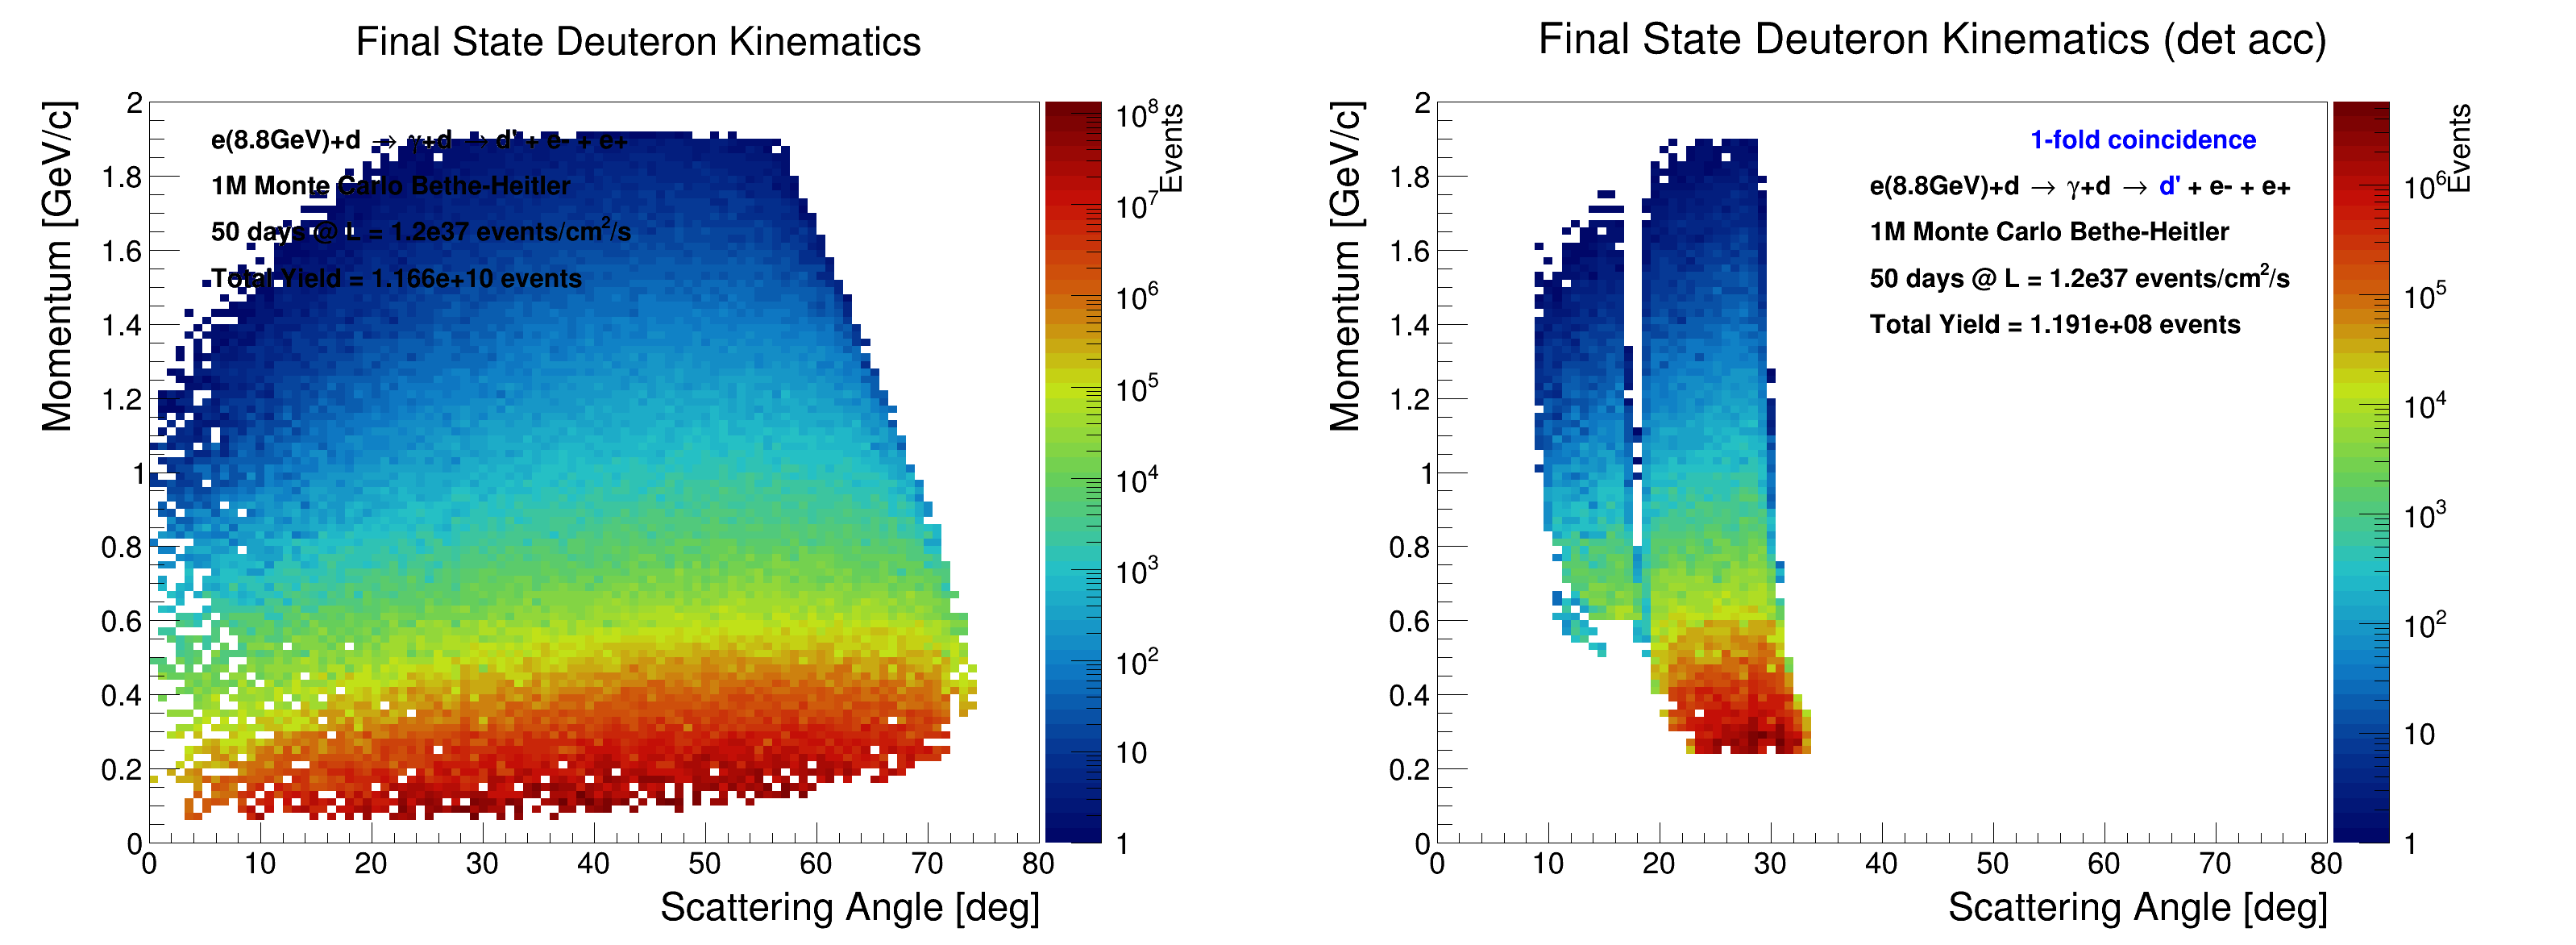

In [7]:
c = TCanvas("c","c",3200,1200)
c.Divide(2,1)

# --------------------------------------
# PAD 1
#
# Deuteron Momentum vs. Scattering Angle
# --------------------------------------
c.cd(1)
gPad.SetRightMargin(0.18)
h2_1=TH2F("h2_1","Final State Deuteron Kinematics;Scattering Angle [deg];Momentum [GeV/c];Events",100,0,80,100,0,2)
tree.Draw("p_D:th_D>>h2_1","weight*{}/{}".format(lumi,events),"goff")
h2_1.Draw("colz")
gPad.SetLogz()
gStyle.SetOptStat(0)
latex.DrawLatexNDC(.15,.85,"e({:.1f}GeV)+d #rightarrow #gamma+d #rightarrow ".format(beamE)+"d' + e- + e+")
latex.DrawLatexNDC(.15,.8,eventtxt)
latex.DrawLatexNDC(.15,.75,"{} days @ L = 1.2e37 events/".format(days)+"cm^{2}/s")
latex.DrawLatexNDC(.15,.7,"Total Yield = " + str(np.format_float_scientific(h2_1.Integral(),precision=3)) + " events")


# --------------------------------------
# PAD 2
#
# Deuteron Momentum vs. Scattering Angle
# (with detector acceptance)
# --------------------------------------
c.cd(2)
gPad.SetRightMargin(0.18)
h2_2=TH2F("h2_2","Final State Deuteron Kinematics (det acc);Scattering Angle [deg];Momentum [GeV/c];Events",100,0,80,100,0,2)
tree.Draw("p_D:th_D>>h2_2","acc_dOut*weight*{}/{}".format(lumi,events),"goff")
h2_2.Draw("colz")
gPad.SetLogz()
gStyle.SetOptStat(0)
latex.DrawLatexNDC(.58,.85,"#color[4]{1-fold coincidence}")
latex.DrawLatexNDC(.45,.8,"e({:.1f}GeV)+d #rightarrow #gamma+d #rightarrow ".format(beamE)+"#color[4]{d'} + e- + e+")
latex.DrawLatexNDC(.45,.75,eventtxt)
latex.DrawLatexNDC(.45,.7,"{} days @ L = 1.2e37 events/".format(days)+"cm^{2}/s")
latex.DrawLatexNDC(.45,.65,"Total Yield = " + str(np.format_float_scientific(h2_2.Integral(),precision=3)) + " events")
'''
# --------------------------------------
# PAD 3
#
# VM mass vs. Scattering Angle
# --------------------------------------
c.cd(3)
gPad.SetRightMargin(0.18)
h2_3=TH2F("h2_3","Dilepton mass vs. Deuteron Angle;Deuteron Scattering Angle [deg];Dilepton mass [GeV/c^{2}];Events",100,0,80,100,1,4)
tree.Draw("m_vm:th_D>>h2_3","weight*{}/{}".format(lumi,events),"goff")
h2_3.Draw("colz")
gPad.SetLogz()
gStyle.SetOptStat(0)

# --------------------------------------
# PAD 4
#
# t vs. Scattering Angle
# --------------------------------------
c.cd(4)
gPad.SetRightMargin(0.18)
h2_4=TH2F("h2_4","Event |t| vs. Deuteron Angle;Deuteron Scattering Angle [deg];|t| [GeV^{2}];Events",100,0,80,100,1,3)
tree.Draw("-t:th_D>>h2_4","weight*{}/{}".format(lumi,events),"goff")
h2_4.Draw("colz")
gPad.SetLogz()
gStyle.SetOptStat(0)
'''
c.Draw()


# Lepton Kinematics

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: h2_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2_2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2_3 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2_4 (Potential memory leak).


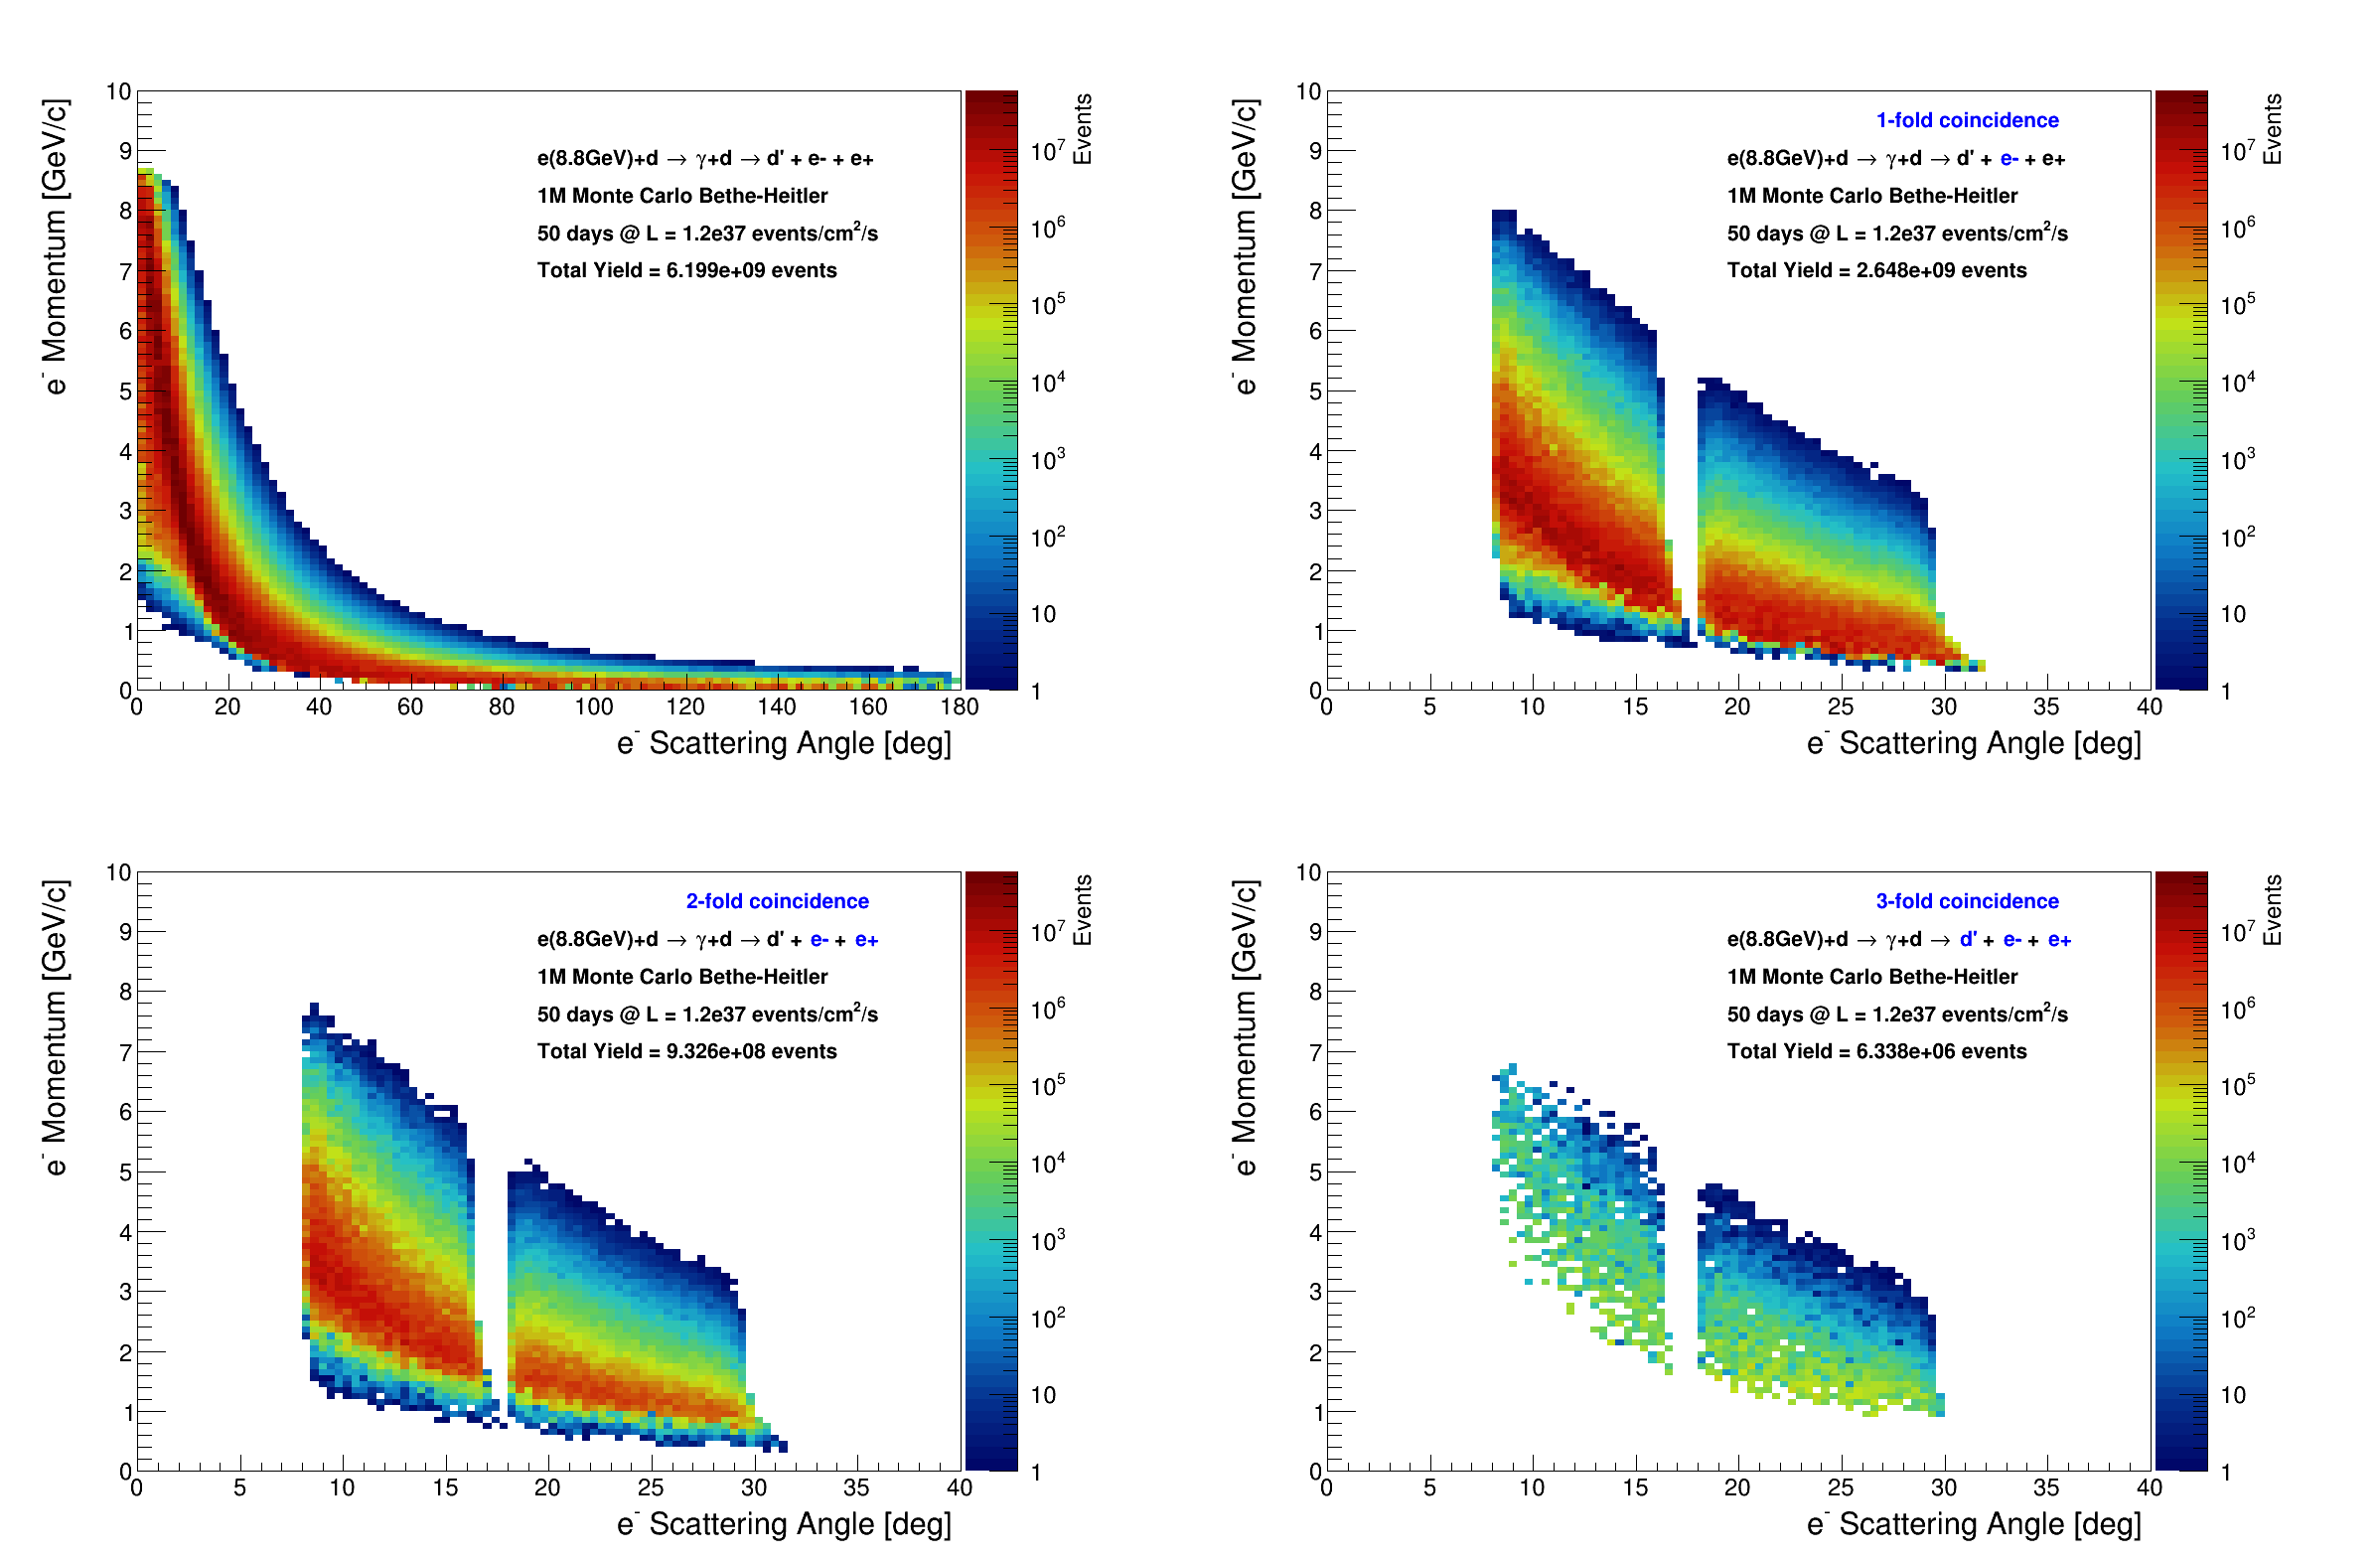

In [104]:
c = TCanvas("c","c",2400,1600)
c.Divide(2,2)

# --------------------------------------
# PAD 1
#
# Electron Momentum vs. Scattering Angle
# --------------------------------------
c.cd(1)
gPad.SetRightMargin(0.18)
h2_1=TH2F("h2_1",";e^{-} Scattering Angle [deg];e^{-} Momentum [GeV/c];Events",100,0,180,100,0,10)
tree.Draw("p_eMinus:th_eMinus>>h2_1","weight*{}/{}".format(lumi,events),"goff")
h2_1.Draw("colz")
gPad.SetLogz()
gStyle.SetOptStat(0)
latex.DrawLatexNDC(.45,.8,"e({:.1f}GeV)+d #rightarrow #gamma+d #rightarrow ".format(beamE)+"d' + e- + e+")
latex.DrawLatexNDC(.45,.75,eventtxt)
latex.DrawLatexNDC(.45,.7,"{} days @ L = 1.2e37 events/".format(days)+"cm^{2}/s")
latex.DrawLatexNDC(.45,.65,"Total Yield = " + str(np.format_float_scientific(h2_1.Integral(),precision=3)) + " events")

# --------------------------------------
# PAD 2
#
# Electron Momentum vs. Scattering Angle
# (with detector acceptance)
# --------------------------------------
c.cd(2)
gPad.SetRightMargin(0.18)
h2_2=TH2F("h2_2",";e^{-} Scattering Angle [deg];e^{-} Momentum [GeV/c];Events",100,0,40,100,0,10)
tree.Draw("p_eMinus:th_eMinus>>h2_2","acc_eMinus*weight*{}/{}".format(lumi,events),"goff")
h2_2.Draw("colz")
h2_2.GetZaxis().SetRangeUser(1,h2_1.GetMaximum())
gPad.SetLogz()
gStyle.SetOptStat(0)
latex.DrawLatexNDC(.58,.85,"#color[4]{1-fold coincidence}")
latex.DrawLatexNDC(.45,.8,"e({:.1f}GeV)+d #rightarrow #gamma+d #rightarrow ".format(beamE)+"d' + #color[4]{e-} + e+")
latex.DrawLatexNDC(.45,.75,eventtxt)
latex.DrawLatexNDC(.45,.7,"{} days @ L = 1.2e37 events/".format(days)+"cm^{2}/s")
latex.DrawLatexNDC(.45,.65,"Total Yield = " + str(np.format_float_scientific(h2_2.Integral(),precision=3)) + " events")

# --------------------------------------
# PAD 3
#
# VM mass vs. Scattering Angle
# --------------------------------------
c.cd(3)
gPad.SetRightMargin(0.18)
h2_3=TH2F("h2_3",";e^{-} Scattering Angle [deg];e^{-} Momentum [GeV/c];Events",100,0,40,100,0,10)
tree.Draw("p_eMinus:th_eMinus>>h2_3","acc_eMinus*acc_ePlus*weight*{}/{}".format(lumi,events),"goff")
h2_3.Draw("colz")
h2_3.GetZaxis().SetRangeUser(1,h2_1.GetMaximum())
gPad.SetLogz()
gStyle.SetOptStat(0)
latex.DrawLatexNDC(.58,.85,"#color[4]{2-fold coincidence}")
latex.DrawLatexNDC(.45,.8,"e({:.1f}GeV)+d #rightarrow #gamma+d #rightarrow ".format(beamE)+"d' + #color[4]{e-} + #color[4]{e+}")
latex.DrawLatexNDC(.45,.75,eventtxt)
latex.DrawLatexNDC(.45,.7,"{} days @ L = 1.2e37 events/".format(days)+"cm^{2}/s")
latex.DrawLatexNDC(.45,.65,"Total Yield = " + str(np.format_float_scientific(h2_3.Integral(),precision=3)) + " events")

# --------------------------------------
# PAD 4
#
# t vs. Scattering Angle
# --------------------------------------
c.cd(4)
gPad.SetRightMargin(0.18)
h2_4=TH2F("h2_4",";e^{-} Scattering Angle [deg];e^{-} Momentum [GeV/c];Events",100,0,40,100,0,10)
tree.Draw("p_eMinus:th_eMinus>>h2_4","acc_eMinus*acc_ePlus*acc_dOut*weight*{}/{}".format(lumi,events),"goff")
h2_4.Draw("colz")
h2_4.GetZaxis().SetRangeUser(1,h2_1.GetMaximum())
gPad.SetLogz()
gStyle.SetOptStat(0)
gStyle.SetPalette(55)
latex.DrawLatexNDC(.58,.85,"#color[4]{3-fold coincidence}")
latex.DrawLatexNDC(.45,.8,"e({:.1f}GeV)+d #rightarrow #gamma+d #rightarrow ".format(beamE)+"#color[4]{d'} + #color[4]{e-} + #color[4]{e+}")
latex.DrawLatexNDC(.45,.75,eventtxt)
latex.DrawLatexNDC(.45,.7,"{} days @ L = 1.2e37 events/".format(days)+"cm^{2}/s")
latex.DrawLatexNDC(.45,.65,"Total Yield = " + str(np.format_float_scientific(h2_4.Integral(),precision=3)) + " events")



c.Draw()


# Event Yield vs. Egamma

6343.841062903404


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


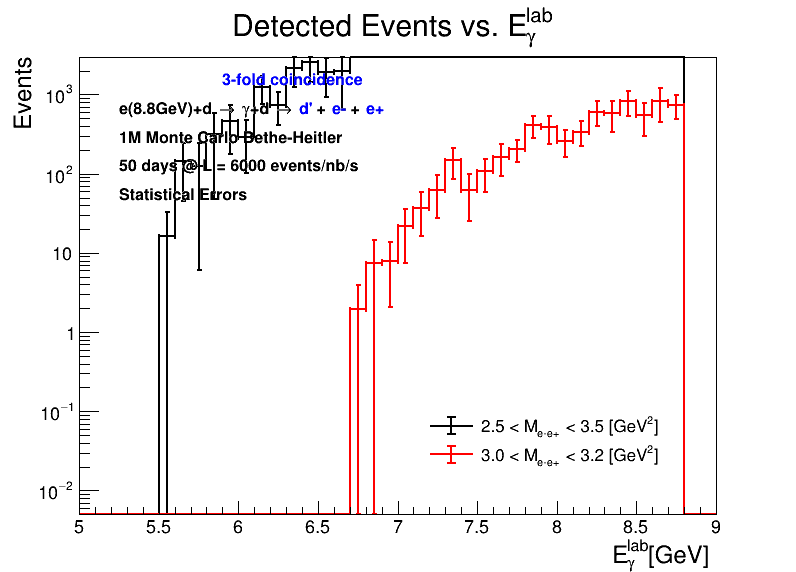

In [8]:
c=TCanvas("c","c",800,600)
minE,maxE,stepE=5,9,40
binE=(maxE-minE)/stepE*1000
h1 = TH1F("h1","Detected Events vs. E^{lab}_{#gamma} ;E^{lab}_{#gamma}[GeV] ;"+"Events",stepE,minE,maxE)
h2 = TH1F("h2","".format(binE),stepE,minE,maxE)
tree.Draw("gammaE>>h1","(m_vm>2.5&&m_vm<3.5)*acc_photo*weight*{}/{}".format(lumi,events),"goff")
tree.Draw("gammaE>>h2","(m_vm>3&&m_vm<3.2)*acc_photo*weight*{}/{}".format(lumi,events),"goff")
h1.GetYaxis().SetRangeUser(0.005,3000)
h1.SetLineColor(1)
h2.SetLineColor(2)
h1.Draw("hist E1")
h2.Draw(" same hist E1")

latex.DrawLatexNDC(.28,.85,"#color[4]{3-fold coincidence}")
latex.DrawLatexNDC(.15,.8,"e({:.1f}GeV)+d #rightarrow #gamma+d #rightarrow ".format(beamE)+"#color[4]{d'} + #color[4]{e-} + #color[4]{e+}")
latex.DrawLatexNDC(.15,.75,eventtxt)
latex.DrawLatexNDC(.15,.7,"{} days @ L = 6000 events/".format(days)+"nb/s")
latex.DrawLatexNDC(.15,.65,"Statistical Errors")

legend=TLegend(0.53,0.18,0.83,0.28)
legend.SetBorderSize(0)
legend.AddEntry(h1,"2.5 < M_{e-e+} < 3.5 [GeV^{2}]","le")
legend.AddEntry(h2,"3.0 < M_{e-e+} < 3.2 [GeV^{2}]","le")
legend.Draw("same")
c.SetLogy(1)
gPad.RedrawAxis()
c.Draw()

print(h2.Integral())